In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
customer_df = pd.read_csv('/content/Customers.csv')

In [10]:
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


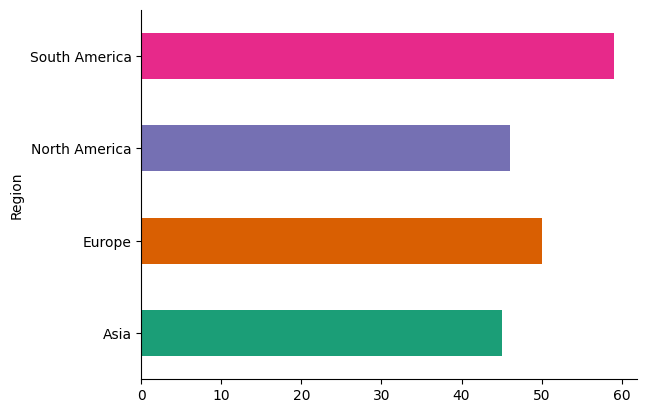

In [15]:
customer_df.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
# Converting 'SignupDate' to datetime objects
customer_df['SignupDate'] = pd.to_datetime(customer_df['SignupDate'], errors='coerce')

# Handle missing values in 'SignupDate'
customer_df.dropna(subset=['SignupDate'], inplace=True)

#Checking  for and handle duplicate rows
customer_df = customer_df.drop_duplicates()

print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None


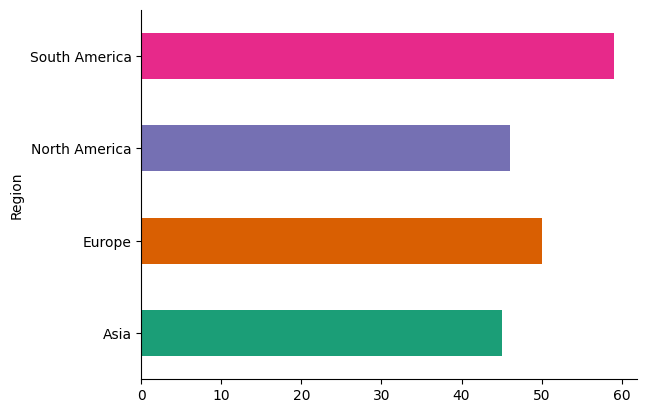

In [17]:
customer_df.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
#here i m counting number of  customer region and monthwise
customer_df['SignupMonth'] = customer_df['SignupDate'].dt.month

region_month_counts = customer_df.groupby(['Region', 'SignupMonth']).size().reset_index(name='CustomerCount')

region_month_counts

,Region,SignupMonth,CustomerCount
0,Asia,1,1
1,Asia,2,7
2,Asia,3,4
3,Asia,4,3
4,Asia,5,4
5,Asia,6,4
6,Asia,7,2
7,Asia,8,2
8,Asia,9,6
9,Asia,10,5


<ipython-input-29-d383cb3ae1c3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='SignupMonth', y='CustomerCount', data=monthly_signups, palette='viridis')


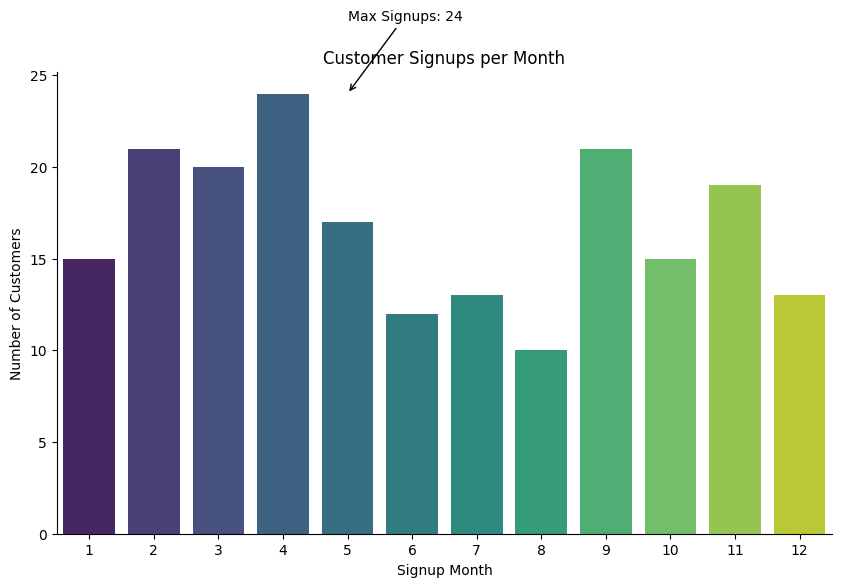

,SignupMonth,CustomerCount
0,1,15
1,2,21
2,3,20
3,4,24
4,5,17
5,6,12
6,7,13
7,8,10
8,9,21
9,10,15


In [29]:
monthly_signups = customer_df.groupby('SignupMonth').size().reset_index(name='CustomerCount')

#  month with the maximum signups
max_signup_month = monthly_signups.loc[monthly_signups['CustomerCount'].idxmax()]

# Creating  bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='SignupMonth', y='CustomerCount', data=monthly_signups, palette='viridis')
plt.title('Customer Signups per Month')
plt.xlabel('Signup Month')
plt.ylabel('Number of Customers')


plt.annotate(f"Max Signups: {max_signup_month['CustomerCount']}",
             xy=(max_signup_month['SignupMonth'], max_signup_month['CustomerCount']),
             xytext=(max_signup_month['SignupMonth'], max_signup_month['CustomerCount'] + 4),
             arrowprops=dict(facecolor='black', arrowstyle='->'))


plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


monthly_signups

In [30]:
transaction_df = pd.read_csv('/content/Transactions.csv')

In [35]:


print(transaction_df.info())

print(transaction_df.describe())

print(transaction_df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
TransactionID    

Total number of transactions: 1000
Average transaction value: 689.9955600000001
Average transaction quantity: 2.537


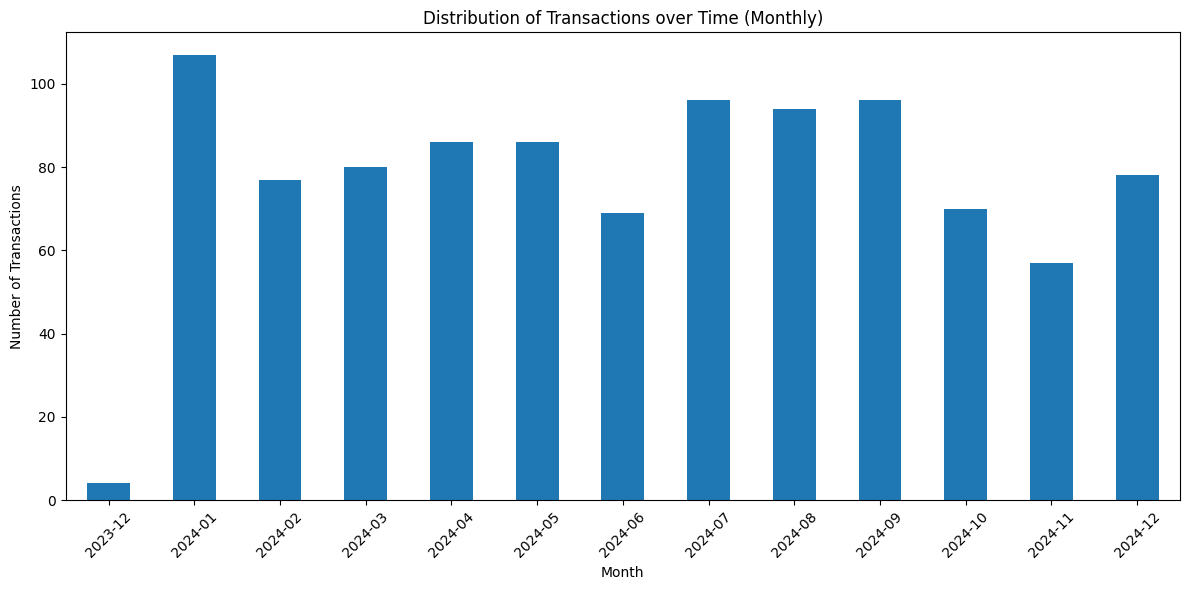

In [39]:
# Distribution of transactions over time.

total_transactions = len(transaction_df)
print(f"Total number of transactions: {total_transactions}")
# Average transaction value
average_transaction_value = transaction_df['TotalValue'].mean()
print(f"Average transaction value: {average_transaction_value}")

# Average transaction quantity
average_transaction_quantity = transaction_df['Quantity'].mean()
print(f"Average transaction quantity: {average_transaction_quantity}")

if not pd.api.types.is_datetime64_any_dtype(transaction_df['TransactionDate']):
    transaction_df['TransactionDate'] = pd.to_datetime(transaction_df['TransactionDate'])


transaction_df['TransactionMonth'] = transaction_df['TransactionDate'].dt.to_period('M')
monthly_transactions = transaction_df.groupby('TransactionMonth').size()

plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='bar')
plt.title('Distribution of Transactions over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
Product_df = pd.read_csv('/content/Products.csv')

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


<ipython-input-41-9af6bace3fde>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=Product_df, palette='pastel')


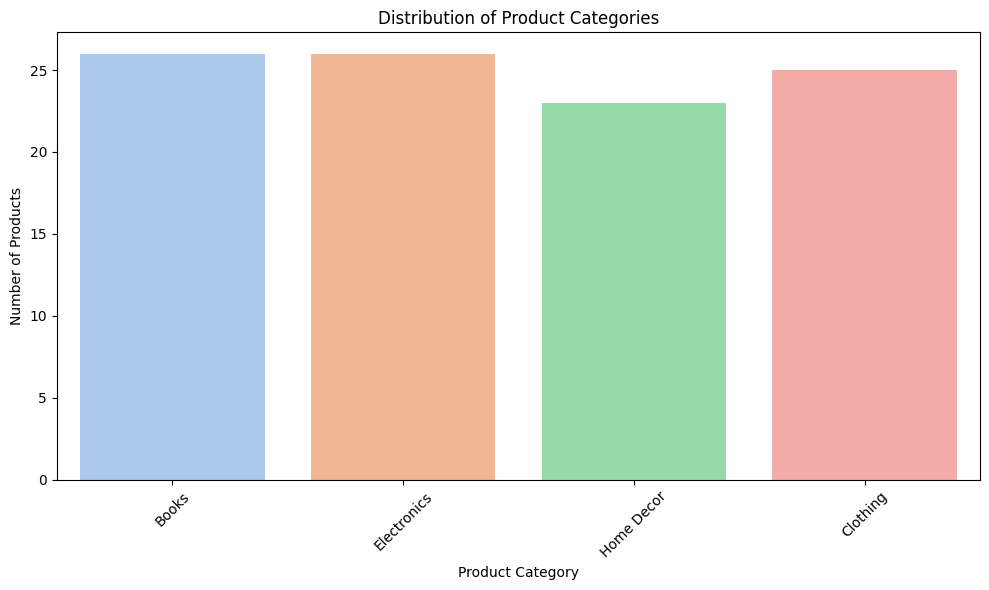

<ipython-input-41-9af6bace3fde>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=Product_df, palette='pastel')


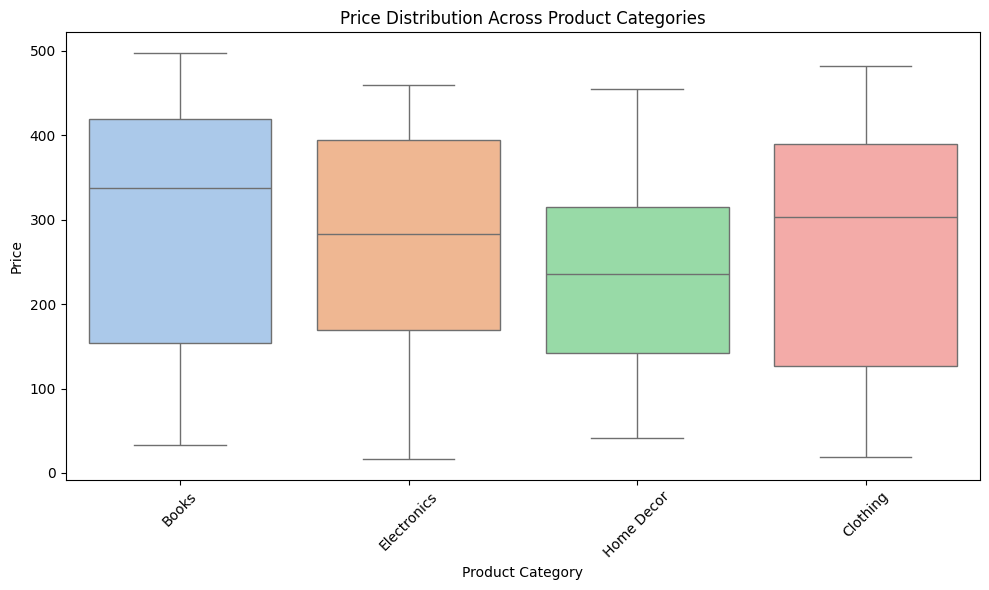

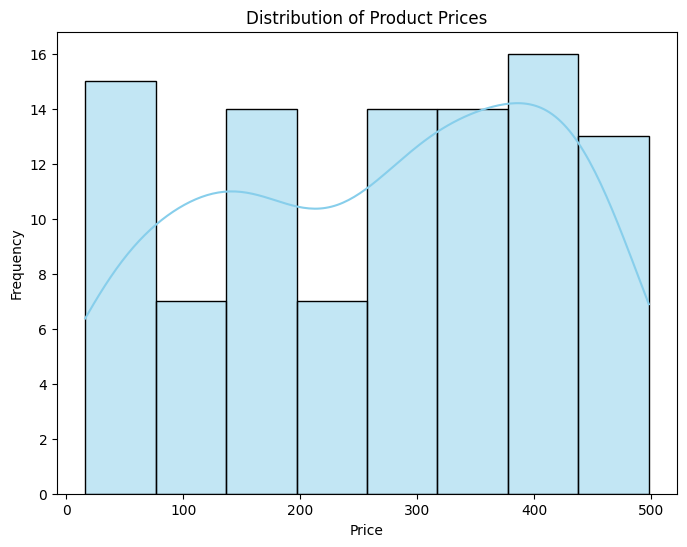

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TransactionID     1000 non-null   object        
 1   CustomerID        1000 non-null   object        
 2   ProductID         1000 non-null   object        
 3   TransactionDate   1000 non-null   datetime64[ns]
 4   Quantity          1000 non-null   int64         
 5   TotalValue        1000 non-null   float64       
 6   Price_x           1000 non-null   float64       
 7   TransactionMonth  1000 non-null   period[M]     
 8   CustomerName      1000 non-null   object        
 9   Region            1000 non-null   object        
 10  SignupDate        1000 non-null   datetime64[ns]
 11  SignupMonth       1000 non-null   int32         
 12  SignupYear        1000 non-null   int32         
 13  ProductName       1000 non-null   object        
 14  Category          1000 no

<ipython-input-41-9af6bace3fde>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=merged_df, estimator=np.sum, palette='viridis')


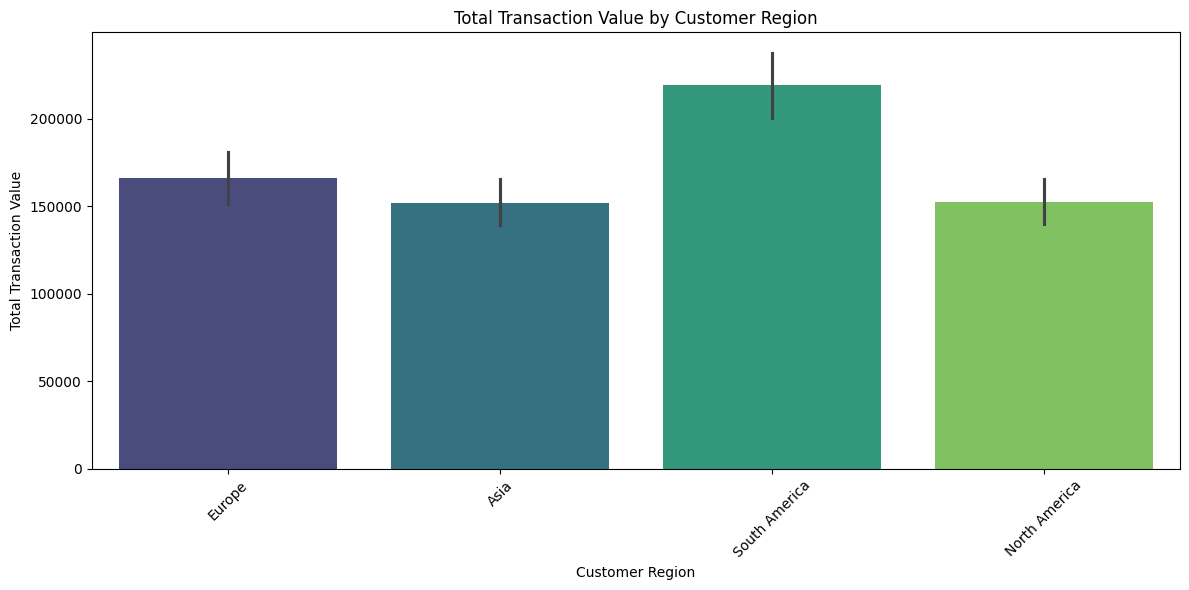

<ipython-input-41-9af6bace3fde>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=merged_df, estimator=np.mean, palette='viridis')


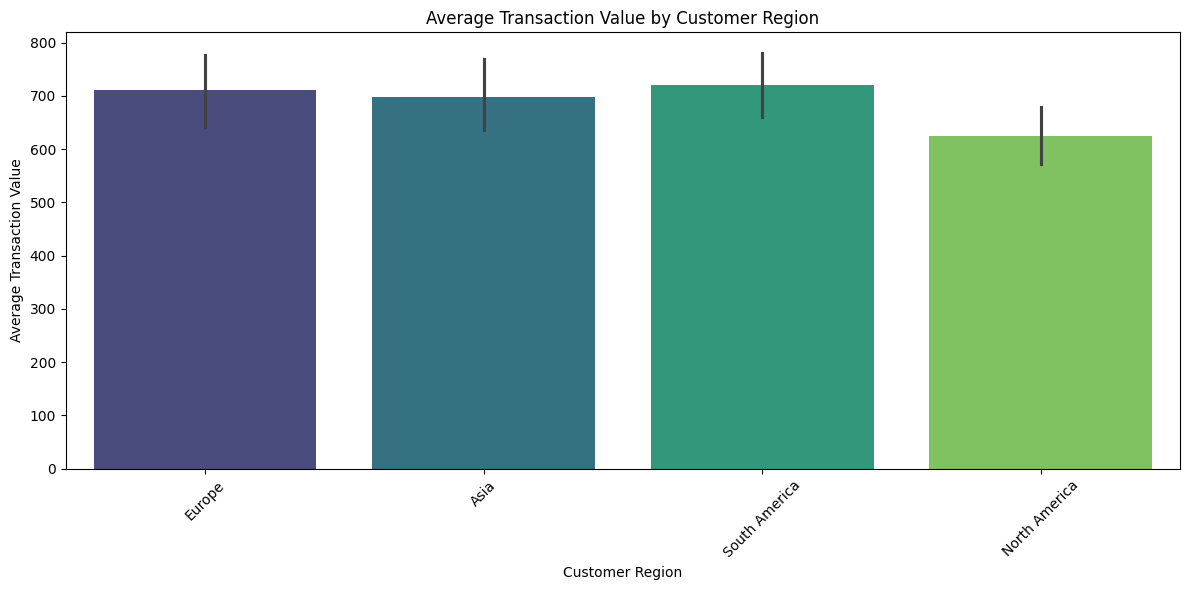

In [41]:
print(Product_df.isnull().sum())
print(Product_df.describe())
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=Product_df, palette='pastel')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=Product_df, palette='pastel')
plt.title('Price Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(Product_df['Price'], kde=True, color='skyblue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

merged_df = pd.merge(transaction_df, customer_df, on='CustomerID', how='inner')
merged_df = pd.merge(merged_df, Product_df, on='ProductID', how='inner')

print(merged_df.info())


plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='TotalValue', data=merged_df, estimator=np.sum, palette='viridis')
plt.title('Total Transaction Value by Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='TotalValue', data=merged_df, estimator=np.mean, palette='viridis')
plt.title('Average Transaction Value by Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()